In [1]:
import glob

csvfiles = glob.glob('*.csv')
csvfiles.sort()
csvfiles

['rummy.mcts1-0 (MCTS-minscore).vs.mcts2-0 (MCTS-minscore).10.card.2.joker.csv',
 'rummy.mcts1-0 (MCTS-minscore).vs.mcts2-25 (MCTS-minscore).10.card.2.joker.csv',
 'rummy.mcts1-0 (MCTS-minscore).vs.mcts2-50 (MCTS-minscore).10.card.2.joker.csv',
 'rummy.mcts1-25 (MCTS-minscore).vs.mcts2-0 (MCTS-minscore).10.card.2.joker.csv',
 'rummy.mcts1-25 (MCTS-minscore).vs.mcts2-25 (MCTS-minscore).10.card.2.joker.csv',
 'rummy.mcts1-25 (MCTS-minscore).vs.mcts2-50 (MCTS-minscore).10.card.2.joker.csv',
 'rummy.mcts1-50 (MCTS-minscore).vs.mcts2-0 (MCTS-minscore).10.card.2.joker.csv',
 'rummy.mcts1-50 (MCTS-minscore).vs.mcts2-25 (MCTS-minscore).10.card.2.joker.csv',
 'rummy.mcts1-50 (MCTS-minscore).vs.mcts2-50 (MCTS-minscore).10.card.2.joker.csv']

In [6]:
import pandas as pd
import numpy as np
heatmap_dict = {}
for csv in csvfiles:
    result = pd.read_csv(csv)
    result.head()
    players = [csv.split('.')[i] for i in [1,3]]
    wins = result['winner'].value_counts().to_dict()
    median_gain = (result['score2']-result['score1']).median()
    mean_gain = (result['score2']-result['score1']).mean()
    print(np.sort(result['score1'].unique()))
    # print(f"{players[0]:<35} : {wins.get(0,0)*100/len(result):>5}% vs. {players[1]:<35} : {wins.get(1,0)*100/len(result):>5}%")
    if players[1] in heatmap_dict.keys():
        heatmap_dict[players[1]][players[0]] = (wins.get(0,0)*100/len(result), median_gain,mean_gain)
    else:
        heatmap_dict[players[1]]={players[0]:(wins.get(0,0)*100/len(result), median_gain,mean_gain)}

[ 0  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 56 57 58 59 60]
[ 0  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 36 37 38 39 40 41 42 43 44 45 46 47 48 49
 50 51 52 53 54 55 56 57 58 60]
[ 0  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60]
[ 0  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 59 60]
[ 0  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60]
[ 0  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 

In [ ]:
heatmap_dict

{'mcts2-0 (MCTS-minscore)': {'mcts1-0 (MCTS-minscore)': (51.2,
   np.float64(2.0),
   np.float64(1.851)),
  'mcts1-25 (MCTS-minscore)': (56.1, np.float64(3.0), np.float64(5.699)),
  'mcts1-50 (MCTS-minscore)': (57.5, np.float64(4.0), np.float64(4.794))},
 'mcts2-25 (MCTS-minscore)': {'mcts1-0 (MCTS-minscore)': (48.8,
   np.float64(-2.0),
   np.float64(0.505)),
  'mcts1-25 (MCTS-minscore)': (49.7, np.float64(-1.5), np.float64(0.482)),
  'mcts1-50 (MCTS-minscore)': (54.0, np.float64(2.0), np.float64(3.385))},
 'mcts2-50 (MCTS-minscore)': {'mcts1-0 (MCTS-minscore)': (45.9,
   np.float64(-2.0),
   np.float64(-1.334)),
  'mcts1-25 (MCTS-minscore)': (49.7, np.float64(-1.5), np.float64(-0.621)),
  'mcts1-50 (MCTS-minscore)': (55.8, np.float64(3.0), np.float64(3.885))}}

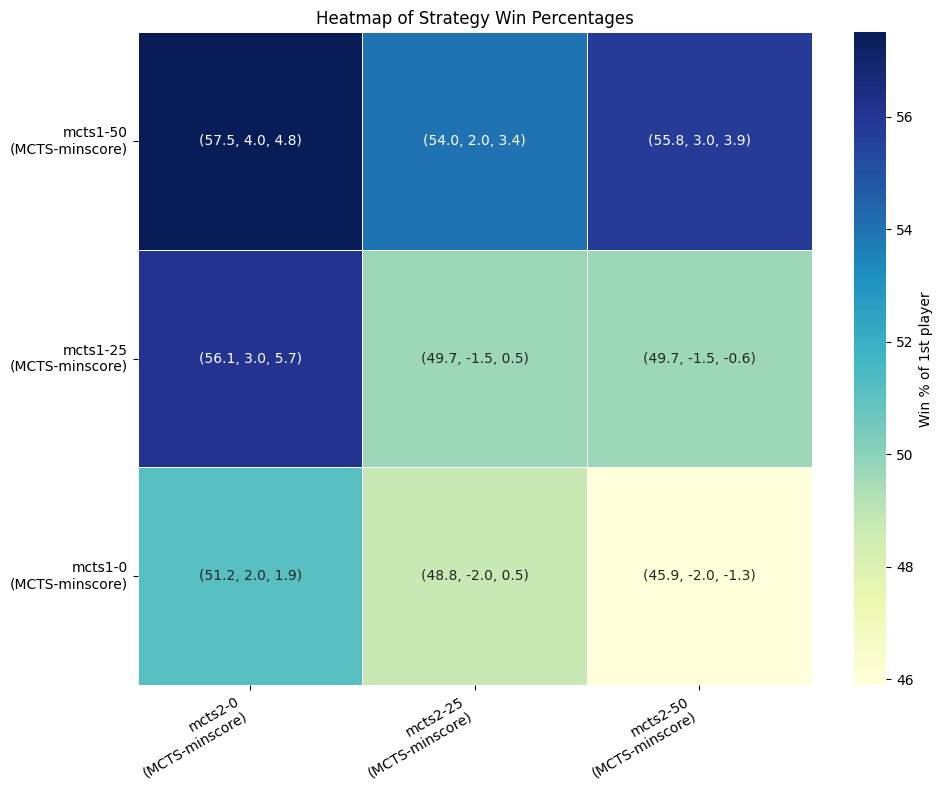

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Extract first values for color
heat_values = pd.DataFrame({col: {row: val[0] for row, val in rows.items()} for col, rows in heatmap_dict.items()})

# Extract full tuples for annotations
annotations = pd.DataFrame({col: {row: f"({val[0]:.1f}, {val[1]:.1f}, {val[2]:.1f})" for row, val in rows.items()} for col, rows in heatmap_dict.items()})

# Optional: wrap labels to prevent overlap
def wrap(label):
    return label.replace(" (", "\n(")

heat_values.index = [wrap(idx) for idx in heat_values.index]
heat_values.columns = [wrap(col) for col in heat_values.columns]
annotations.index = heat_values.index
annotations.columns = heat_values.columns
heat_values = heat_values.iloc[::-1]
annotations = annotations.iloc[::-1]

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(heat_values, annot=annotations, fmt="", cmap="YlGnBu", linewidths=0.5, cbar_kws={"label": "Win % of 1st player"})

plt.title("Heatmap of Strategy Win Percentages")
plt.xticks(rotation=30, ha="right")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()